In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/DELL/Downloads/online_shoppers_intention.csv")

df['Revenue'] = df['Revenue'].astype(int)

In [3]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


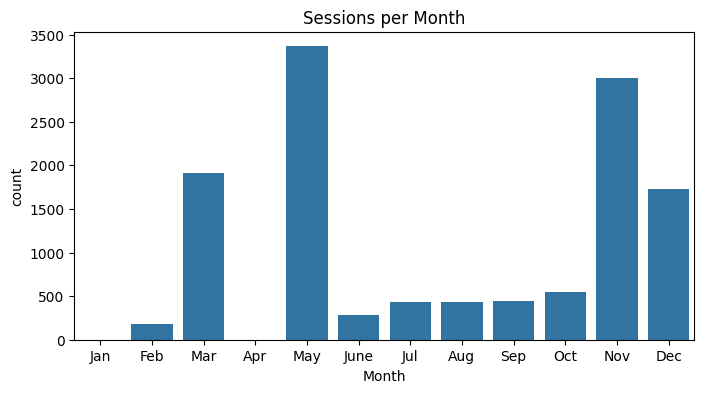

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x='Month', data=df, order=['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Sessions per Month')
plt.show()

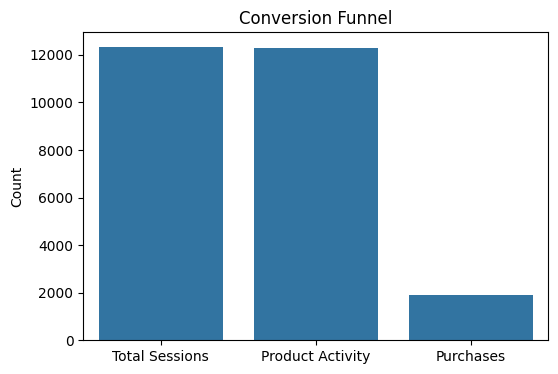

In [8]:
total_sessions = len(df)
product_sessions = df[df['ProductRelated'] > 0].shape[0]
purchases = df[df['Revenue']==1].shape[0]

funnel_values = [total_sessions, product_sessions, purchases]
funnel_labels = ['Total Sessions','Product Activity','Purchases']

plt.figure(figsize=(6,4))
sns.barplot(x=funnel_labels, y=funnel_values)
plt.title('Conversion Funnel')
plt.ylabel('Count')
plt.show()

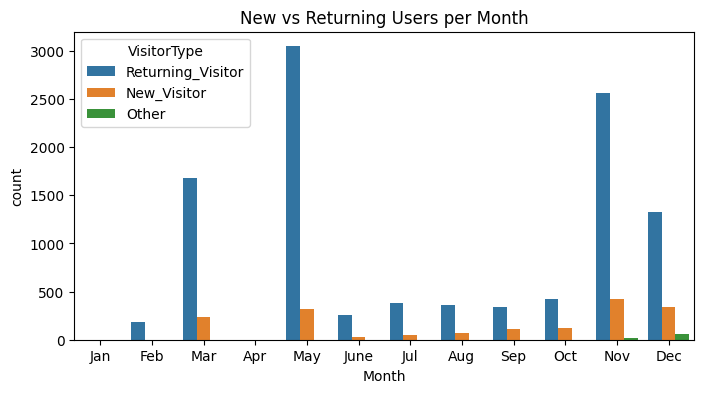

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='Month', hue='VisitorType', data=df,
              order=['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('New vs Returning Users per Month')
plt.show()

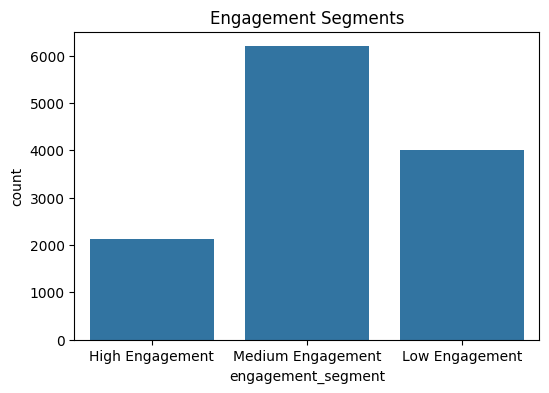

In [10]:
def engagement(row):
    if row['ProductRelated_Duration'] > 300 and row['PageValues'] > 5:
        return 'High Engagement'
    elif row['ProductRelated_Duration'] > 300 or row['PageValues'] > 5:
        return 'Medium Engagement'
    else:
        return 'Low Engagement'

df['engagement_segment'] = df.apply(engagement, axis=1)

plt.figure(figsize=(6,4))
sns.countplot(x='engagement_segment', data=df, order=['High Engagement','Medium Engagement','Low Engagement'])
plt.title('Engagement Segments')
plt.show()

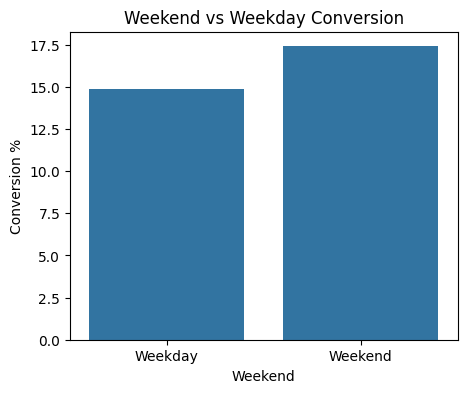

In [11]:
df['Weekend'] = df['Weekend'].astype(int)


weekend_summary = df.groupby('Weekend')['Revenue'].agg(['count','sum']).reset_index()
weekend_summary['conversion_pct'] = 100 * weekend_summary['sum'] / weekend_summary['count']

plt.figure(figsize=(5,4))
sns.barplot(x='Weekend', y='conversion_pct', data=weekend_summary)
plt.xticks([0,1], ['Weekday','Weekend'])
plt.ylabel('Conversion %')
plt.title('Weekend vs Weekday Conversion')
plt.show()